In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../classify/classification_dataset.csv")

In [3]:
df.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class
10773,21,71.50,1.751,23.320279,21.1,33.0,26.0,0.103,1.82,94.0,138.0,1,3
5496,42,67.30,1.623,25.549242,18.0,48.5,52.0,0.152,2.19,64.0,130.0,1,0
13054,36,90.50,1.785,28.403518,14.7,64.0,45.0,0.264,2.62,87.0,125.0,1,2
11825,29,85.50,1.823,25.727215,17.7,49.5,43.0,0.122,2.54,76.0,122.0,1,3
1326,53,88.48,1.773,28.146710,35.6,36.3,18.0,0.064,1.83,76.0,130.0,1,3


In [4]:
df2 = pd.read_csv("../classify/classification_dataset_two.csv")

In [5]:
df2.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1,3,4
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1,0,3
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1,2,0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1,3,3
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1,3,4


In [6]:
df['clusters'] = df2['clusters']

In [7]:
df.sample(random_state=42,n=5)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,21,71.50,1.751,23.320279,21.1,33.0,26.0,0.103,1.82,94.0,138.0,1,3,4
5496,42,67.30,1.623,25.549242,18.0,48.5,52.0,0.152,2.19,64.0,130.0,1,0,3
13054,36,90.50,1.785,28.403518,14.7,64.0,45.0,0.264,2.62,87.0,125.0,1,2,0
11825,29,85.50,1.823,25.727215,17.7,49.5,43.0,0.122,2.54,76.0,122.0,1,3,3
1326,53,88.48,1.773,28.146710,35.6,36.3,18.0,0.064,1.83,76.0,130.0,1,3,4


In [157]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer,MinMaxScaler,RobustScaler
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV,ShuffleSplit,train_test_split
from sklearn.metrics import mean_squared_error

In [96]:
def log_tranform(x):
    return np.log1p(x)

In [97]:
columns_to_scale = df.copy() # data
standard_scaler = StandardScaler() # standard_scaler 
min_max_scaler = MinMaxScaler() # min_max_scaler 
robust_scaler = RobustScaler() # robust_scaler
function_transformer = FunctionTransformer(log_tranform) # functional

In [98]:
column_transformer = ColumnTransformer(
     transformers=[
        (
            'standard_scalering',standard_scaler,[1, 4, 5, 6, 9, 10]
        ),
        (
            'functional_transformer',function_transformer,[3]
        )
    ], remainder='passthrough'
)

In [147]:
my_pipe = Pipeline(
    [
        ("composer",column_transformer), # 
        # ('reg',Ridge(random_state=42))
        ('reg',LinearRegression(n_jobs=-2))
    ]
)

In [148]:
my_pipe.named_steps['composer']

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_scalering', StandardScaler(),
                                 [1, 4, 5, 6, 9, 10]),
                                ('functional_transformer',
                                 FunctionTransformer(func=<function log_tranform at 0x000001A9905ED940>),
                                 [3])])

In [149]:
my_params = [
    {
        # Column transfomer
        'composer':[min_max_scaler]
        # 'composer':[min_max_scaler,robust_scaler,None]
    },

    {
        # Ridge
        "reg":[Ridge(random_state=42)],
        # higher alpha --> higher regularistion (treats overfitting)
        'reg__alpha':[0.01,0.1,0.5,1,5,10], 
        "reg__max_iter":[50,100,1000,1500],
    },
 
    {
        # Lasso
        "reg":[Lasso(random_state=42)],
        # lower alpha --> higher regularistion (treats underfitting)
        'reg__alpha':[0.01,0.1,0.5,1], 
        "reg__max_iter":[50,100,1000,1500],
        "reg__warm_start":[True,False],
    },
]

my_cv = ShuffleSplit(n_splits=5,test_size=.20,random_state=42)

In [150]:
X = df.drop(columns=['age'])
y = df['age']

In [151]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [152]:
mygrid = GridSearchCV(my_pipe,param_grid=my_params,cv=my_cv)
mygrid.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('composer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standard_scalering',
                                                                         StandardScaler(),
                                                                         [1, 4,
                                                                          5, 6,
                                                                          9,
                                                                          10]),
                                                                        ('functional_transformer',
                                                                         FunctionTransformer(func=<function log_tranform at 0x000001A9905ED940>),
                          

In [153]:
print(f"Best params: {mygrid.best_params_}\n")
print(f"Best estimator: {mygrid.best_estimator_}\n")
print(f"Best validation score: {mygrid.best_score_}")

Best params: {'composer': MinMaxScaler()}

Best estimator: Pipeline(steps=[('composer', MinMaxScaler()),
                ('reg', LinearRegression(n_jobs=-2))])

Best validation score: 0.5631061061695223


In [154]:
print(mygrid.best_estimator_.named_steps['reg'].coef_,"\n") # Coefficients
print(mygrid.best_estimator_.named_steps["reg"].n_features_in_,"\n") # Number of feaetures present
print(mygrid.best_estimator_.named_steps["reg"].intercept_,"\n") # intercept

# This throws an error;
# AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'
# print(mygrid.best_estimator_.named_steps["reg"].feature_names_in_,"\n")# Named features

[-18.14801052 -11.40710799  27.34192601 -20.37315903   2.54755975
 -47.18915785   7.77514808 -48.36699412   6.1090402   24.2839336
  15.92504465 -13.04786381   0.99250366] 

13 

72.99120762347862 



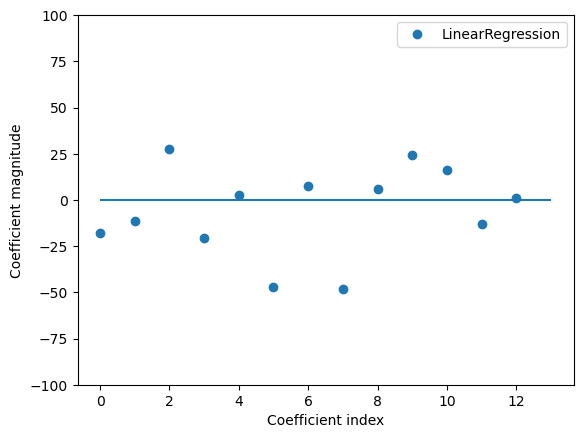

In [155]:
plt.plot(mygrid.best_estimator_.named_steps["reg"].coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(mygrid.best_estimator_.named_steps["reg"].coef_))
plt.ylim(-100, 100)
plt.legend()

In [158]:
# grid.predict(X_test)
y_pred_test = mygrid.predict(X_test) # prediction
print(f'RMSE test: {np.around((mean_squared_error(y_test, y_pred_test,squared=False)))}') # RMSE scoe
print(f"Accuracy score (r^2): {np.around(mygrid.score(X_test, y_test),3)}") # r^2 score
print(f'Standard Deviation of Price: {np.around(df.age.std(),3)}') # std of age
# RMSE score is lower than std of age; Algorithm does well?

RMSE test: 9.0
Accuracy score (r^2): 0.549
Standard Deviation of Price: 13.626


In [179]:
percent_error = 100* ((y_pred_test.astype(np.int8)-y_test)/y_test)
data = {
    'predicted_age':y_pred_test.astype(np.int8),'actual_age':y_test,"percentage_error":percent_error
}
predictions_frame = pd.DataFrame(data)
predictions_frame.to_csv("predictions/regression_predictions.csv",index=True)
predictions_frame.head(5)

,predicted_age,actual_age,percentage_error
10773,45,21,114.285714
5496,41,42,-2.380952
13054,26,36,-27.777778
11825,20,29,-31.034483
1326,45,53,-15.094340


In [178]:
cond = predictions_frame.percentage_error == 0
predictions_frame[cond].value_counts().sum()

99

Text(0, 0.5, 'Actual Age')

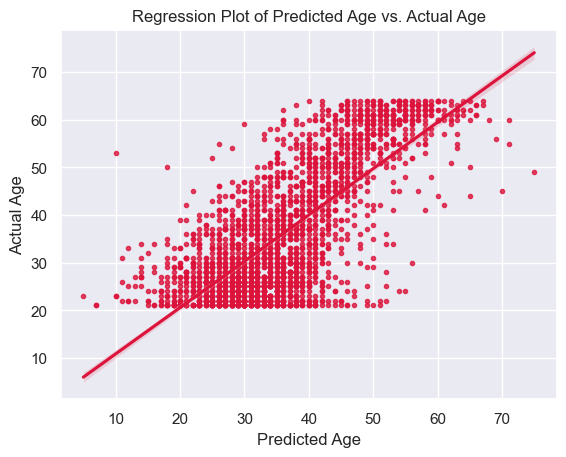

In [177]:
# Regression plot
sns.set_theme(style='darkgrid')
sns.regplot(data=predictions_frame,
        x='predicted_age',
        y='actual_age',
        fit_reg=True,
        color='crimson',
        marker='.')
plt.title('Regression Plot of Predicted Age vs. Actual Age')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')